# Задание 1. Загрузка данных
Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

Задание 2. Первичное изучение данных
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [313]:
import pandas as pd
data = pd.read_csv('C:\\Users\\Мария\\Desktop\\horse_data.csv', header = None, na_values = '?', encoding='utf-8')
#header = ['surgery?', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'pain', 'outcome']
#индексы ['0','1','3','4','5','6','10','22']
data.head()


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [314]:
# Выбранные для анализа столбцы с указанием типов данных в них:

# 0 = категориальный (порядковый)
# 1 = категориальный (порядковый)
# 3 = категориальный (номинальный)
# 4 = числовой (дискретный) - нормальная температура 37,8 rectal_temperature
# 5 = числовой (дискретный) - 30-40 нормально  pulse
# 6 = числовой (непрерывный) - нормальная скорость от 8 до 10 respiratory_rate
# 10 = категориальный (порядковый)
# 22 = категориальный (порядковый)

In [315]:
df = data[[0, 1, 3, 4, 5, 6, 10, 22]] #<---выбрали наши 8 столбцов
df.reset_index()
df.columns = ['surgery', 'Age', 'rectal_temperature', 'pulse', 'respiratory_rate', 'temperature_of_extremities', 'pain', 'outcome']
df.head(15)


,surgery,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
5,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0
6,1.0,1,37.9,48.0,16.0,1.0,3.0,1.0
7,1.0,1,NaN,60.0,NaN,3.0,NaN,2.0
8,2.0,1,NaN,80.0,36.0,3.0,4.0,3.0
9,2.0,9,38.3,90.0,NaN,1.0,5.0,1.0


In [316]:
df.isna().sum()

surgery                        1
Age                            0
rectal_temperature            60
pulse                         24
respiratory_rate              58
temperature_of_extremities    56
pain                          55
outcome                        1
dtype: int64

Задание 2. Первичное изучение данных
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

In [317]:
df.describe().round(2)

,surgery,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
count,299.00,300.00,240.00,276.00,242.00,244.00,245.00,299.00
mean,1.40,1.64,38.17,71.91,30.42,2.35,2.95,1.55
std,0.49,2.17,0.73,28.63,17.64,1.05,1.31,0.74
min,1.00,1.00,35.40,30.00,8.00,1.00,1.00,1.00
25%,1.00,1.00,37.80,48.00,18.50,1.00,2.00,1.00
50%,1.00,1.00,38.20,64.00,24.50,3.00,3.00,1.00
75%,2.00,1.00,38.50,88.00,36.00,3.00,4.00,2.00
max,2.00,9.00,40.80,184.00,96.00,4.00,5.00,3.00


In [318]:
#Посчитаем минимум, максимум и размах для количественных характеристик 
print(f'Максимум по столбцу Пульс:',df.pulse.max())
print(f'Минимум по столбцу Пульс:',df.pulse.min())
print(f'Размах по столбцу Пульс: %.1f' % (df.pulse.max()-df.pulse.min()))

print()
print(f'Минимум по столбцу Ректальная температура:',df.rectal_temperature.min())
print(f'Максимум по столбцу Ректальная температура:',df.rectal_temperature.max())
print('Размах по столбцу Ректальная температура: %.1f' % (df.rectal_temperature.max()-df.rectal_temperature.min()))
print()
print(f'Минимум по столбцу Частота дыхания:',df.respiratory_rate.min())
print(f'Максимум по столбцу Частота дыхания:',df.respiratory_rate.max())
print('Размах по столбцу Частота дыхания: %.1f' % (df.respiratory_rate.max()-df.respiratory_rate.min()))



Максимум по столбцу Пульс: 184.0
Минимум по столбцу Пульс: 30.0
Размах по столбцу Пульс: 154.0

Минимум по столбцу Ректальная температура: 35.4
Максимум по столбцу Ректальная температура: 40.8
Размах по столбцу Ректальная температура: 5.4

Минимум по столбцу Частота дыхания: 8.0
Максимум по столбцу Частота дыхания: 96.0
Размах по столбцу Частота дыхания: 88.0


In [319]:
q = df.pulse.quantile([0.95])
q

0.95    125.0
Name: pulse, dtype: float64

In [320]:
#Посчитаем 0,25 и 0,75 квартили и межквартильный размах для количественных характеристик 
print(f'0,25 квартиль по столбцу Пульс: %.1f' %df.pulse.quantile([0.25]))
print(f'0,75 квартиль по столбцу Пульс: %.1f' %df.pulse.quantile([0.75]))
print(f'Межквартильный размах по столбцу Пульс: %.1f' %(df.pulse.quantile(0.75)-df.pulse.quantile(0.25)))
print()
print(f'0,25 квартиль по столбцу Ректальная температура: %.1f' %df.rectal_temperature.quantile([0.25]))
print(f'0,75 квартиль по столбцу Ректальная температура: %.1f' %df.rectal_temperature.quantile([0.75]))
print(f'Межквартильный размах по столбцу Ректальная температура: %.1f' %(df.rectal_temperature.quantile(0.75)-df.rectal_temperature.quantile([0.25])))
print()
print(f'0,25 квартиль по столбцу Частота дыхания: %.1f' %df.respiratory_rate.quantile([0.25]))
print(f'0,75 квартиль по столбцу Частота дыхания: %.1f' %df.respiratory_rate.quantile([0.75]))
print(f'Межквартильный размах по Частота дыхания: %.1f' %(df.respiratory_rate.quantile(0.75)-df.respiratory_rate.quantile(0.25)))

0,25 квартиль по столбцу Пульс: 48.0
0,75 квартиль по столбцу Пульс: 88.0
Межквартильный размах по столбцу Пульс: 40.0

0,25 квартиль по столбцу Ректальная температура: 37.8
0,75 квартиль по столбцу Ректальная температура: 38.5
Межквартильный размах по столбцу Ректальная температура: 0.7

0,25 квартиль по столбцу Частота дыхания: 18.5
0,75 квартиль по столбцу Частота дыхания: 36.0
Межквартильный размах по Частота дыхания: 17.5


In [321]:
# Посчитаем СКО и дисперсию 
print(f'СКО по столбцу Пульс: %.2f' %df.pulse.std())
print(f'Дисперсия по столбцу Пульс: %.2f' %df.pulse.var())
print(f'Наличие выбросов слева по по столбцу Пульс: %.2f' %(df.pulse.quantile(0.25) - 1.5*(df.pulse.quantile(0.75)-df.pulse.quantile(0.25))))
print(f'Наличие выбросов справа по по столбцу Пульс: %.2f' %(df.pulse.quantile(0.75) + 1.5*(df.pulse.quantile(0.75)-df.pulse.quantile(0.25))))
print()
print(f'СКО по столбцу Ректальная температура: %.2f' %df.rectal_temperature.std())
print(f'Дисперсия по столбцу Ректальная температура: %.2f' %df.rectal_temperature.var())
print(f'Наличие выбросов слева по по столбцу Ректальная температура: %.2f' %(df.rectal_temperature.quantile(0.25) - 1.5*(df.rectal_temperature.quantile(0.75)-df.rectal_temperature.quantile(0.25))))
print(f'Наличие выбросов справа по по столбцу Ректальная температура: %.2f' %(df.rectal_temperature.quantile(0.75) + 1.5*(df.rectal_temperature.quantile(0.75)-df.rectal_temperature.quantile(0.25))))
print()
print(f'СКО по столбцу Частота дыхания: %.2f' %df.respiratory_rate.std())
print(f'Дисперсия по столбцу Частота дыхания: %.2f' %df.respiratory_rate.var())
print(f'Наличие выбросов слева по по столбцу Частота дыхания: %.2f' %(df.respiratory_rate.quantile(0.25) - 1.5*(df.respiratory_rate.quantile(0.75)-df.respiratory_rate.quantile(0.25))))
print(f'Наличие выбросов справа по по столбцу Частота дыхания: %.2f' %(df.respiratory_rate.quantile(0.75) + 1.5*(df.respiratory_rate.quantile(0.75)-df.respiratory_rate.quantile(0.25))))

СКО по столбцу Пульс: 28.63
Дисперсия по столбцу Пульс: 819.71
Наличие выбросов слева по по столбцу Пульс: -12.00
Наличие выбросов справа по по столбцу Пульс: 148.00

СКО по столбцу Ректальная температура: 0.73
Дисперсия по столбцу Ректальная температура: 0.54
Наличие выбросов слева по по столбцу Ректальная температура: 36.75
Наличие выбросов справа по по столбцу Ректальная температура: 39.55

СКО по столбцу Частота дыхания: 17.64
Дисперсия по столбцу Частота дыхания: 311.25
Наличие выбросов слева по по столбцу Частота дыхания: -7.75
Наличие выбросов справа по по столбцу Частота дыхания: 62.25


Расчитав основные характеристики можем сделать вывод, что выбросы с обеих сторон у нас есть только по параметру "Ректальная температура" (при проверке на наличие выбросов (через 1.5 IOR) справа и слева наблюдаются выбросы (min < 36,75 и max > 39.55) - поэтому необходима проверка на корректность данных столбца), по параметрам "Пульс" и "Частота дыхания" наши распределени смещены вправо, поэтому исследовать на выбросы с левой стороны не имеет смысла, необходимо провести проверку на наличие выбросов справа у показателей пульса и частоты дыхания.

In [322]:
#- нормальная температура 37,8 rectal_temperature
# 30-40 нормально  pulse
# нормальная скорость от 8 до 10 respiratory_rate

In [323]:
df[df.pulse > 148] # Для анализа выбросов по высокому пульсу

,surgery,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
41,2.0,9,39.0,150.0,72.0,NaN,NaN,1.0
55,1.0,9,38.6,160.0,20.0,3.0,3.0,2.0
255,1.0,9,38.8,184.0,84.0,1.0,4.0,2.0
275,1.0,9,38.8,150.0,50.0,1.0,5.0,2.0


In [324]:
# Для анализа выбросов по низкой температуре
df[df.rectal_temperature < 36.75]

,surgery,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
44,1.0,1,35.4,140.0,24.0,3.0,4.0,3.0
80,1.0,1,36.4,98.0,35.0,3.0,4.0,2.0
118,1.0,1,36.5,78.0,30.0,1.0,5.0,1.0
141,2.0,1,36.0,42.0,30.0,NaN,NaN,2.0
238,2.0,1,36.1,88.0,NaN,3.0,3.0,3.0
251,2.0,1,36.6,42.0,18.0,3.0,1.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [325]:
# Для анализа выбросов по высокой температуре
df[df.rectal_temperature > 39.55]

,surgery,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
20,1.0,1,39.9,72.0,60.0,1.0,5.0,1.0
54,2.0,1,40.3,114.0,36.0,3.0,2.0,3.0
75,1.0,9,39.7,100.0,NaN,3.0,2.0,3.0
91,2.0,1,40.3,114.0,36.0,3.0,2.0,2.0
99,2.0,1,39.6,108.0,51.0,3.0,2.0,1.0
259,1.0,1,40.8,72.0,42.0,3.0,2.0,2.0
281,2.0,1,40.0,78.0,NaN,3.0,2.0,2.0


In [326]:
df[df.respiratory_rate > 60] # Для анализа выбросов по частоте дыхания

,surgery,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
39,1.0,9,39.2,146.0,96.0,NaN,NaN,2.0
41,2.0,9,39.0,150.0,72.0,NaN,NaN,1.0
82,1.0,9,38.1,100.0,80.0,3.0,3.0,1.0
84,1.0,1,37.8,60.0,80.0,1.0,2.0,1.0
103,1.0,9,38.0,140.0,68.0,1.0,3.0,1.0
106,1.0,1,38.3,52.0,96.0,NaN,NaN,1.0
120,1.0,1,39.4,54.0,66.0,1.0,2.0,1.0
125,1.0,1,38.0,42.0,68.0,4.0,3.0,1.0
186,1.0,1,39.3,64.0,90.0,2.0,NaN,1.0


<AxesSubplot:title={'center':'Распределение частоты дыхания'}, ylabel='Frequency'>

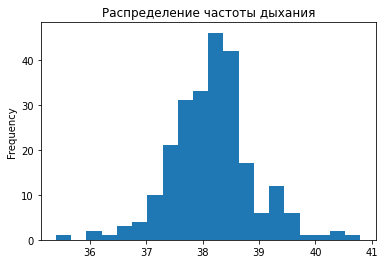

In [327]:
import matplotlib.pyplot as plt
df['rectal_temperature'].plot(kind='hist', 
                   title='Распределение частоты дыхания', bins=20)


<AxesSubplot:title={'center':'Распределение частоты дыхания'}, ylabel='Frequency'>

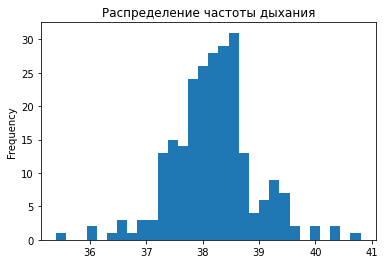

In [328]:
df['rectal_temperature'].plot(kind='hist', 
                   title='Распределение частоты дыхания', bins=30)


In [329]:
# Задание 3
df.info()
for col in df.columns:
    missing = df[col].isnull().mean()
    print(f'{col} - {missing :.1%}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal_temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory_rate            242 non-null    float64
 5   temperature_of_extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB
surgery - 0.3%
Age - 0.0%
rectal_temperature - 20.0%
pulse - 8.0%
respiratory_rate - 19.3%
temperature_of_extremities - 18.7%
pain - 18.3%
outcome - 0.3%


In [330]:
# Формирование нового дата фрейма без пропусков
hd = pd.read_csv('C:\\Users\\Мария\\Desktop\\horse_data.csv', header = None, na_values = '?', encoding='utf-8')
#header = ['surgery?', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'pain', 'outcome']
#индексы ['0','1','3','4','5','6','10','22']

hd = data[[0, 1, 3, 4, 5, 6, 10, 22]] #<---выбрали наши 8 столбцов
hd.reset_index()
hd.columns = ['surgery', 'Age', 'rectal_temperature', 'pulse', 'respiratory_rate', 'temperature_of_extremities', 'pain', 'outcome']
hd.head()

,surgery,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


In [331]:
#Пропуски столбца с болью заменяем медианой по столбцу,
#без взаимосвязи с другими показателями, т.к. определение боли субъективно

hd['pain'].fillna(hd['pain'].median(), inplace=True)

<ipython-input-331-0ea6889a8ca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd['pain'].fillna(hd['pain'].median(), inplace=True)


In [332]:
#Пропуски столбца с ректальной температурой заменяем медианой по столбцу, 
#в соответствии с возможной взаимосвязью по наличию боли

hd['rectal_temperature'].fillna(hd.groupby(['pain'])['rectal_temperature'].transform('median'), inplace = True)

<ipython-input-332-bc11439fb6d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd['rectal_temperature'].fillna(hd.groupby(['pain'])['rectal_temperature'].transform('median'), inplace = True)


In [344]:
hd[df.outcome.isnull() ]

,surgery,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
132,1.0,1,38.0,48.0,20.0,3.0,4.0,NaN


In [346]:
# Соответственно, вероятнее всего операция проводилась и мы можем проставить значение 1.0 в пропуске
hd['surgery'].fillna(1.0, inplace=True)

<ipython-input-346-bb74c8a9b9ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd['surgery'].fillna(1.0, inplace=True)


In [334]:
#Пропуски столбца с пульсом заменяем медианой по столбцу, 
#в соответствии с возможной взаимосвязью по ректальной температуре

hd['pulse'].fillna(hd.groupby('rectal_temperature')['pulse'].transform('median'), inplace=True)

<ipython-input-334-dce80eb14e13>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd['pulse'].fillna(hd.groupby('rectal_temperature')['pulse'].transform('median'), inplace=True)


In [335]:
#Пропуски столбца с частотой дыхания заменяем медианой по столбцу, 
#без взаимосвязи с другими показателями, т.к. полезность показателя частоты дыхания сомнительна из-за больших колебаний

hd['respiratory_rate'].fillna(hd['respiratory_rate'].median(), inplace=True)

<ipython-input-335-39d8f2972c8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd['respiratory_rate'].fillna(hd['respiratory_rate'].median(), inplace=True)


In [339]:
#Пропуски столбца с температурой конечностей заменяем медианой по столбцу
hd['temperature_of_extremities'].fillna(hd['temperature_of_extremities'].median(), inplace = True)

<ipython-input-339-23b6e1d01750>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd['temperature_of_extremities'].fillna(hd['temperature_of_extremities'].median(), inplace = True)


In [349]:
#Пропуски столбца с состоянием лошади заменяем медианой по столбцу,
#в соответствии с возможной взаимосвязью по ректальной температуре, проведению операции и возрастом
hd['outcome'].fillna(hd.groupby(['rectal_temperature', 'surgery', 'Age'])['outcome'].transform('median'), inplace = True) 

<ipython-input-349-8e60dc336eed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd['outcome'].fillna(hd.groupby(['rectal_temperature', 'surgery', 'Age'])['outcome'].transform('median'), inplace = True)


In [350]:
hd.info()
for col in hd.columns:
    missing = hd[col].isnull().mean()
    print(f'{col} - {missing :.1%}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     300 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal_temperature          300 non-null    float64
 3   pulse                       300 non-null    float64
 4   respiratory_rate            300 non-null    float64
 5   temperature_of_extremities  300 non-null    float64
 6   pain                        300 non-null    float64
 7   outcome                     300 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB
surgery - 0.0%
Age - 0.0%
rectal_temperature - 0.0%
pulse - 0.0%
respiratory_rate - 0.0%
temperature_of_extremities - 0.0%
pain - 0.0%
outcome - 0.0%
